In [6]:
import pandas as pd

In [7]:
# Load the dataset
df = pd.read_csv("https://raw.githubusercontent.com/dsrscientist/DSData/master/Telecom_customer_churn.csv")

In [8]:
# display the first five rows
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [9]:
# check for missing values
print("missing values per column:\n", df.isnull().sum())

missing values per column:
 customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64


In [10]:
# Check the datatypes of each column
print("Data types of each column:\n", df.dtypes)

Data types of each column:
 customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object


In [11]:
# Identify categorical columns
categorical_cols = df.select_dtypes(include=['object']).columns


In [12]:
# print categorical columns
print("Categorical columns:\n", categorical_cols)

Categorical columns:
 Index(['customerID', 'gender', 'Partner', 'Dependents', 'PhoneService',
       'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'Contract', 'PaperlessBilling', 'PaymentMethod', 'TotalCharges',
       'Churn'],
      dtype='object')


In [13]:
from sklearn.preprocessing import LabelEncoder

In [14]:
# Check the number of unique values for each column
for col in df.columns:
    print(f"Column '{col}': {df[col].nunique()} unique values")


Column 'customerID': 7043 unique values
Column 'gender': 2 unique values
Column 'SeniorCitizen': 2 unique values
Column 'Partner': 2 unique values
Column 'Dependents': 2 unique values
Column 'tenure': 73 unique values
Column 'PhoneService': 2 unique values
Column 'MultipleLines': 3 unique values
Column 'InternetService': 3 unique values
Column 'OnlineSecurity': 3 unique values
Column 'OnlineBackup': 3 unique values
Column 'DeviceProtection': 3 unique values
Column 'TechSupport': 3 unique values
Column 'StreamingTV': 3 unique values
Column 'StreamingMovies': 3 unique values
Column 'Contract': 3 unique values
Column 'PaperlessBilling': 2 unique values
Column 'PaymentMethod': 4 unique values
Column 'MonthlyCharges': 1585 unique values
Column 'TotalCharges': 6531 unique values
Column 'Churn': 2 unique values


In [15]:
# List of binary categorical columns
binary_cols = ["gender", "Partner", "Dependents", "PhoneService", "PaperlessBilling", "SeniorCitizen","Churn"]

In [16]:
# Apply label encoding (Yes->1/ No-> 0)
le = LabelEncoder()
for col in binary_cols:
    df[col] = le.fit_transform(df[col])

In [17]:
# Check the result
df[binary_cols].head()

,gender,Partner,Dependents,PhoneService,PaperlessBilling,SeniorCitizen,Churn
0,0,1,0,0,1,0,0
1,1,0,0,1,0,0,0
2,1,0,0,1,1,0,1
3,1,0,0,0,0,0,0
4,0,0,0,1,1,0,1


In [18]:
# convert 'TotalCharges' to numeric
df["TotalCharges"] = pd.to_numeric(df["TotalCharges"], errors="coerce")

In [19]:
# Check the result
df['TotalCharges'].dtype

dtype('float64')

In [20]:
# Exclude the columns that were already label encoded
cat_cols = [col for col in df.select_dtypes(include=["object"]).columns if col not in binary_cols and col != "customerID"]

In [21]:
print("Categorical columns:\n", cat_cols)

Categorical columns:
 ['MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaymentMethod']


In [22]:
# encode the categorical columns
df = pd.get_dummies(df, columns=cat_cols, drop_first=True)

In [23]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,...,TechSupport_Yes,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,7590-VHVEG,0,0,1,0,1,0,1,29.85,29.85,...,False,False,False,False,False,False,False,False,True,False
1,5575-GNVDE,1,0,0,0,34,1,0,56.95,1889.50,...,False,False,False,False,False,True,False,False,False,True
2,3668-QPYBK,1,0,0,0,2,1,1,53.85,108.15,...,False,False,False,False,False,False,False,False,False,True
3,7795-CFOCW,1,0,0,0,45,0,0,42.30,1840.75,...,True,False,False,False,False,True,False,False,False,False
4,9237-HQITU,0,0,0,0,2,1,1,70.70,151.65,...,False,False,False,False,False,False,False,False,True,False


In [24]:
print(df)

      customerID  gender  SeniorCitizen  Partner  Dependents  tenure  \
0     7590-VHVEG       0              0        1           0       1   
1     5575-GNVDE       1              0        0           0      34   
2     3668-QPYBK       1              0        0           0       2   
3     7795-CFOCW       1              0        0           0      45   
4     9237-HQITU       0              0        0           0       2   
...          ...     ...            ...      ...         ...     ...   
7038  6840-RESVB       1              0        1           1      24   
7039  2234-XADUH       0              0        1           1      72   
7040  4801-JZAZL       0              0        1           1      11   
7041  8361-LTMKD       1              1        1           0       4   
7042  3186-AJIEK       1              0        0           0      66   

      PhoneService  PaperlessBilling  MonthlyCharges  TotalCharges  ...  \
0                0                 1           29.85        

In [25]:
# drop 'customerID' column
df.drop("customerID", axis=1, inplace=True)

In [26]:
import pandas as pd
from sklearn.impute import SimpleImputer

In [27]:
# Create an imputer to fill missing values with the mean
imputer = SimpleImputer(strategy='mean')
# Reshape 'TotalCharges' to a 2D array before imputation
df['TotalCharges'] = imputer.fit_transform(df['TotalCharges'].values.reshape(-1, 1))

In [28]:
print("missing values per column:\n", df.isnull().sum())

missing values per column:
 gender                                   0
SeniorCitizen                            0
Partner                                  0
Dependents                               0
tenure                                   0
PhoneService                             0
PaperlessBilling                         0
MonthlyCharges                           0
TotalCharges                             0
Churn                                    0
MultipleLines_No phone service           0
MultipleLines_Yes                        0
InternetService_Fiber optic              0
InternetService_No                       0
OnlineSecurity_No internet service       0
OnlineSecurity_Yes                       0
OnlineBackup_No internet service         0
OnlineBackup_Yes                         0
DeviceProtection_No internet service     0
DeviceProtection_Yes                     0
TechSupport_No internet service          0
TechSupport_Yes                          0
StreamingTV_No internet se

In [29]:
import seaborn as sns
import matplotlib.pyplot as plt

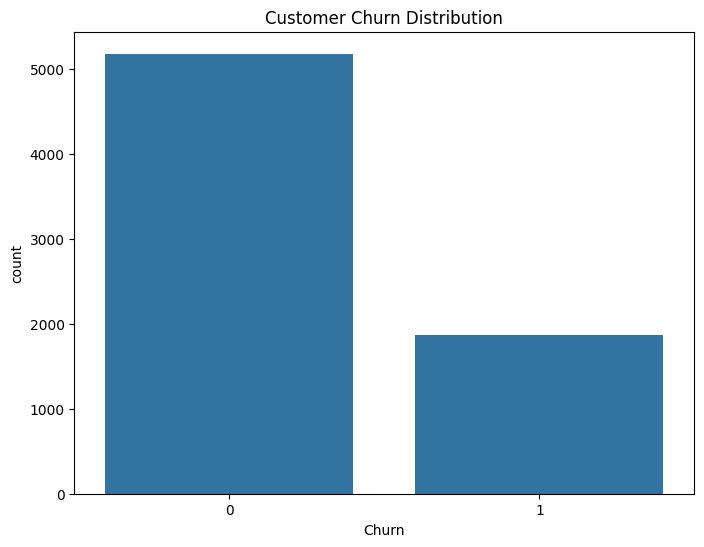

In [30]:
# Countplot for churn
plt.figure(figsize=(8, 6))
sns.countplot(x=df["Churn"])
plt.title("Customer Churn Distribution")
plt.show()

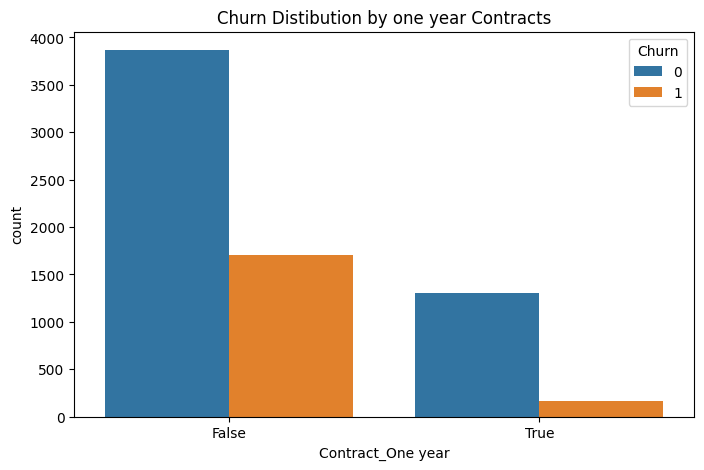

In [31]:
plt.figure(figsize=(8, 5))
sns.countplot(x="Contract_One year", hue="Churn", data=df)
plt.title("Churn Distibution by one year Contracts")
plt.show()

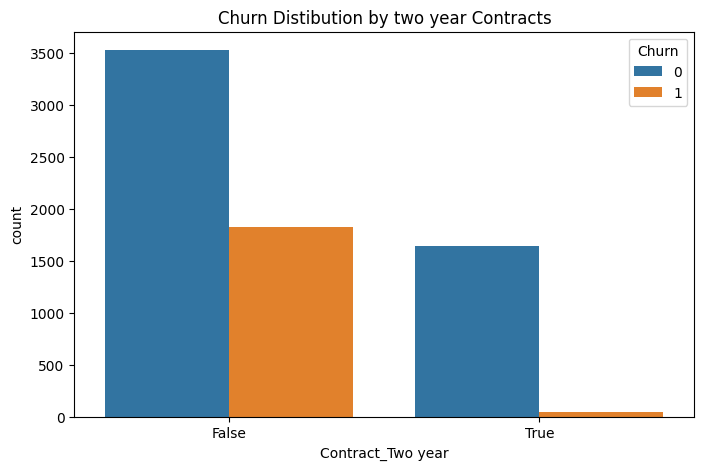

In [32]:
plt.figure(figsize=(8, 5))
sns.countplot(x="Contract_Two year", hue="Churn", data=df)
plt.title("Churn Distibution by two year Contracts")
plt.show()

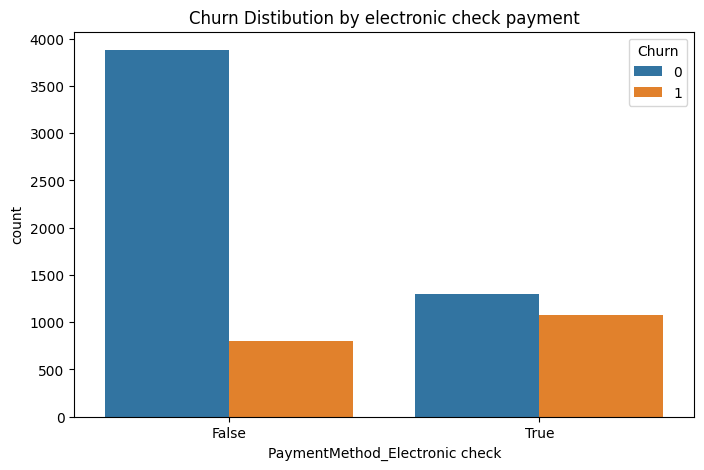

In [33]:
plt.figure(figsize=(8, 5))
sns.countplot(x="PaymentMethod_Electronic check", hue="Churn", data=df)
plt.title("Churn Distibution by electronic check payment")
plt.show()

In [34]:
# Conclusion: High churn rate, Inconvenient

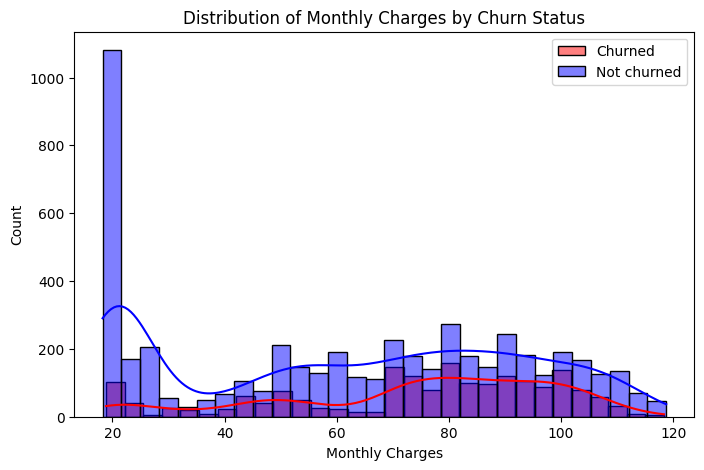

In [35]:
plt.figure(figsize=(8, 5))
sns.histplot(df[df["Churn"] == 1]["MonthlyCharges"], bins=30, kde=True, color="red", label="Churned")
sns.histplot(df[df["Churn"] == 0]["MonthlyCharges"], bins=30, kde=True, color="blue", label="Not churned")
plt.legend()
plt.title("Distribution of Monthly Charges by Churn Status")
plt.xlabel("Monthly Charges")
plt.ylabel("Count")
plt.show()

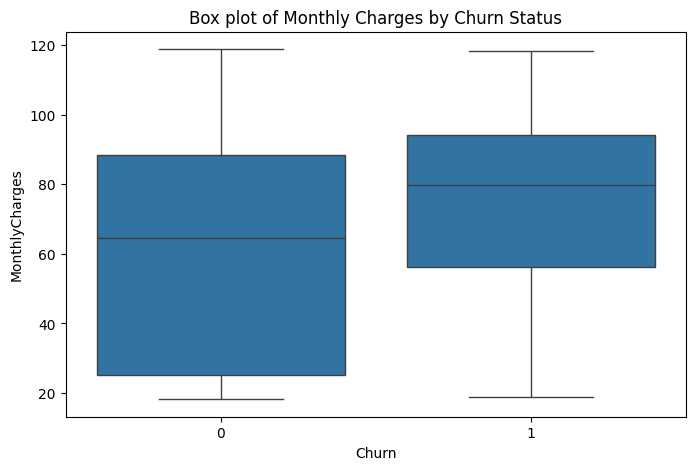

In [36]:
plt.figure(figsize=(8, 5))
sns.boxplot(x="Churn", y="MonthlyCharges", data=df)
plt.title("Box plot of Monthly Charges by Churn Status")
plt.show()

In [37]:
# Conclusion: Higher charges == Higher churn rate

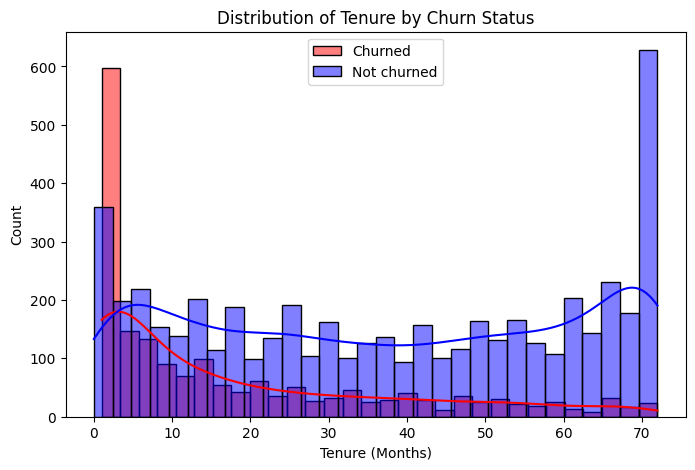

In [38]:
plt.figure(figsize=(8, 5))
sns.histplot(df[df["Churn"] == 1]["tenure"], bins=30, kde=True, color="red", label="Churned")
sns.histplot(df[df["Churn"] == 0]["tenure"], bins=30, kde=True, color="blue", label="Not churned")
plt.legend()
plt.title("Distribution of Tenure by Churn Status")
plt.xlabel("Tenure (Months)")
plt.ylabel("Count")
plt.show()

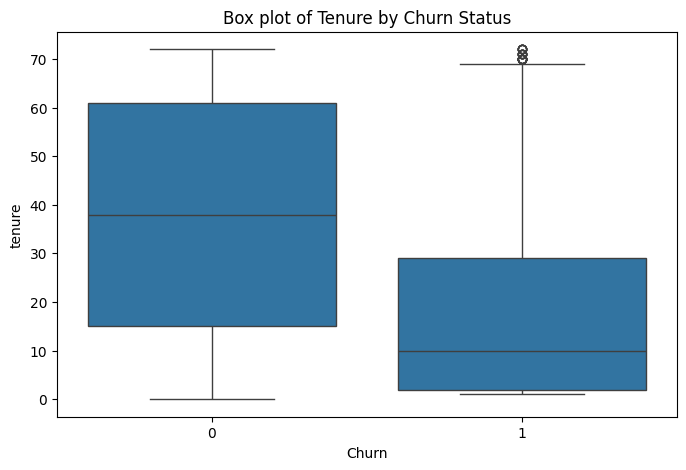

In [39]:
plt.figure(figsize=(8, 5))
sns.boxplot(x="Churn", y="tenure", data=df)
plt.title("Box plot of Tenure by Churn Status")
plt.show()

In [40]:
# Conclusion: Early customers churn more

In [41]:
# create a column for month to month customers
df["Contract_Month-to-month"] = 1 - (df['Contract_One year'] + df['Contract_Two year'])

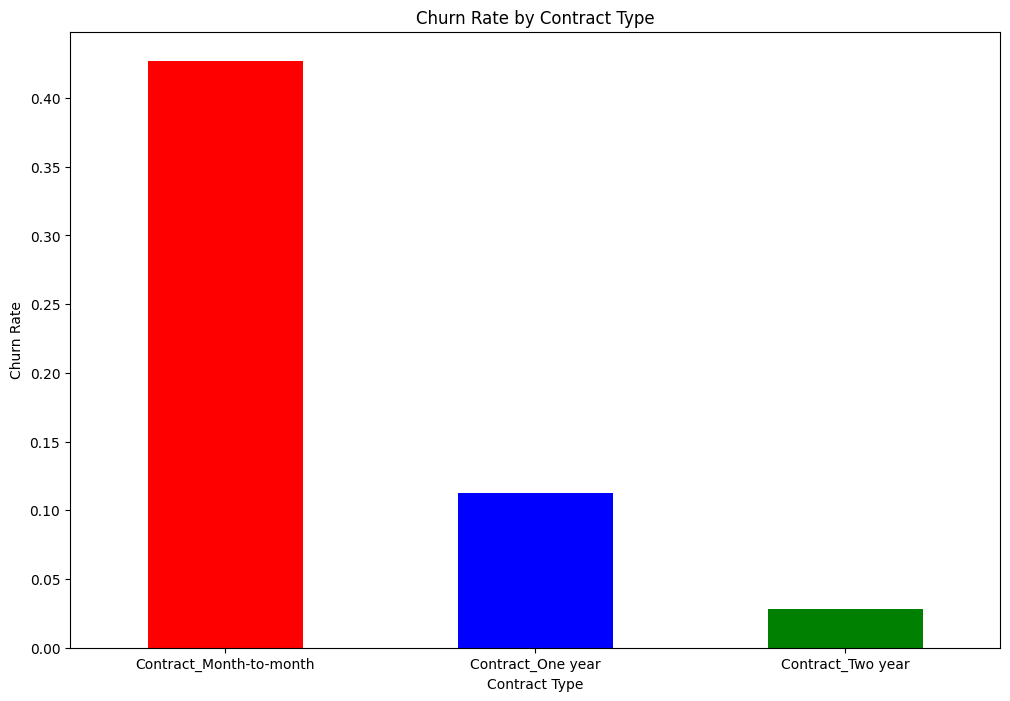

In [42]:
# Create a 'Contract' column from one-hot encoded data
df["Contract"] = df[["Contract_Month-to-month", "Contract_One year", "Contract_Two year"]].idxmax(axis=1)

# Compute churn rate per contract type
contract_churn = df.groupby("Contract")["Churn"].mean()

# Plot the results
contract_churn.plot(kind="bar", figsize=(12, 8), color=["red", "blue", "green"])
plt.title("Churn Rate by Contract Type")
plt.ylabel("Churn Rate")
plt.xticks(rotation=0)
plt.xlabel("Contract Type")
plt.show()


In [43]:
# Conclusion: Long term contracts have lower churn rates

In [44]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,...,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Contract_Month-to-month,Contract
0,0,0,1,0,1,0,1,29.85,29.85,0,...,False,False,False,False,False,False,True,False,1,Contract_Month-to-month
1,1,0,0,0,34,1,0,56.95,1889.50,0,...,False,False,False,True,False,False,False,True,0,Contract_One year
2,1,0,0,0,2,1,1,53.85,108.15,1,...,False,False,False,False,False,False,False,True,1,Contract_Month-to-month
3,1,0,0,0,45,0,0,42.30,1840.75,0,...,False,False,False,True,False,False,False,False,0,Contract_One year
4,0,0,0,0,2,1,1,70.70,151.65,1,...,False,False,False,False,False,False,True,False,1,Contract_Month-to-month


In [45]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,...,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Contract_Month-to-month,Contract
0,0,0,1,0,1,0,1,29.85,29.85,0,...,False,False,False,False,False,False,True,False,1,Contract_Month-to-month
1,1,0,0,0,34,1,0,56.95,1889.50,0,...,False,False,False,True,False,False,False,True,0,Contract_One year
2,1,0,0,0,2,1,1,53.85,108.15,1,...,False,False,False,False,False,False,False,True,1,Contract_Month-to-month
3,1,0,0,0,45,0,0,42.30,1840.75,0,...,False,False,False,True,False,False,False,False,0,Contract_One year
4,0,0,0,0,2,1,1,70.70,151.65,1,...,False,False,False,False,False,False,True,False,1,Contract_Month-to-month


In [46]:
df = pd.get_dummies(df, drop_first=True)

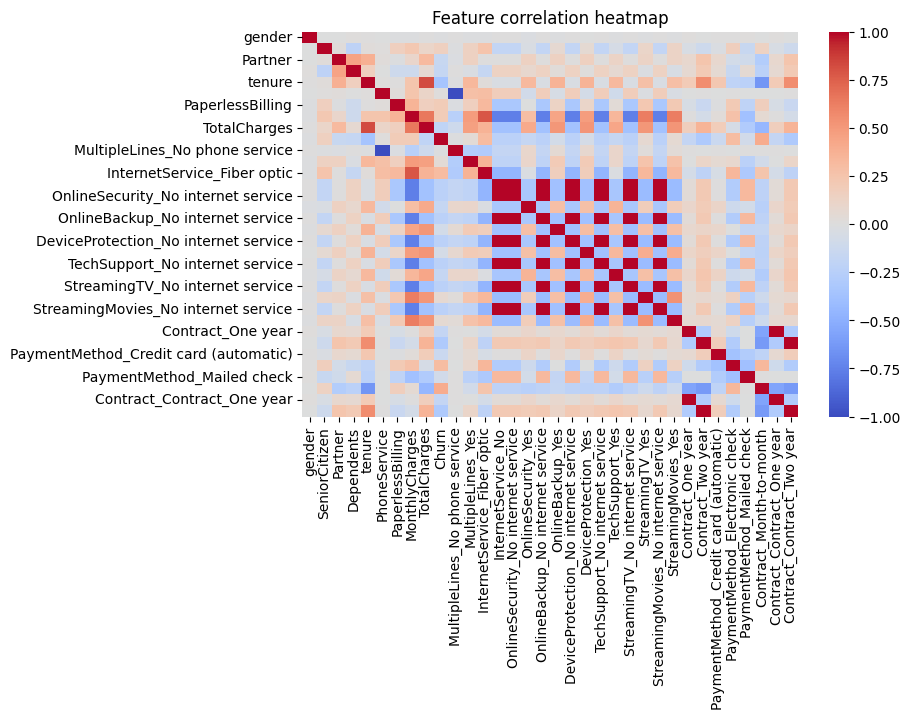

In [47]:
plt.figure(figsize=(8,5))
sns.heatmap(df.corr(), annot=False, cmap="coolwarm")
plt.title("Feature correlation heatmap")
plt.show()

In [48]:
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestClassifier

In [49]:
# model for feature selection
rnd_clf = RandomForestClassifier()

In [50]:
#  Initialize the RFE
rfe = RFE(estimator=rnd_clf, n_features_to_select=30)

In [51]:
# Split the data into features and target
X = df.drop("Churn", axis=1)
y = df["Churn"]

In [52]:
# Fit the data
rfe.fit(X, y)

RFE(estimator=RandomForestClassifier(), n_features_to_select=30)

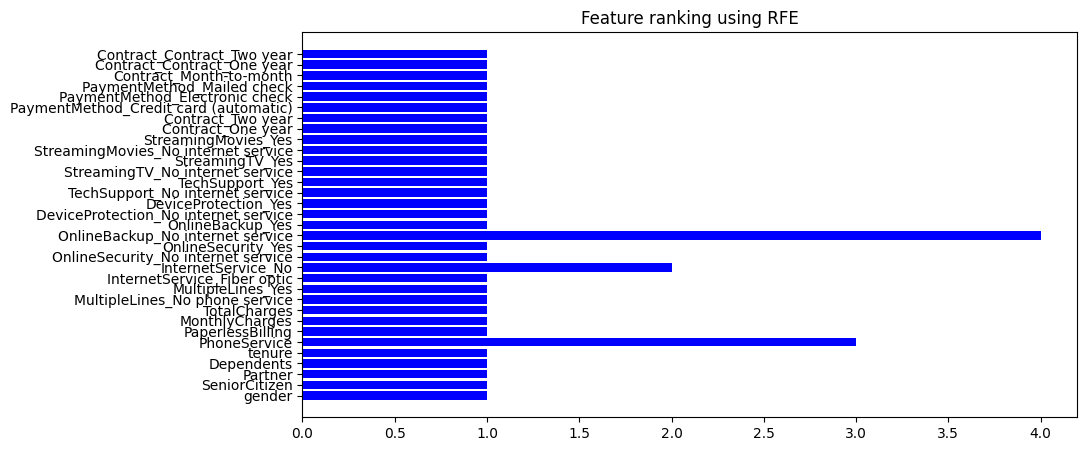

In [53]:
# check the results
plt.figure(figsize=(10,5))
plt.barh(X.columns, rfe.ranking_, color="blue")
plt.title("Feature ranking using RFE")
plt.show()

In [54]:
# Get the selected features from the RFE
X_selected = rfe.transform(X)

In [55]:
from sklearn.model_selection import train_test_split

In [56]:
X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, stratify=y)

In [57]:
from sklearn.preprocessing import StandardScaler

In [58]:
# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [59]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression, Ridge
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier as LightGBM

In [60]:
# define the models
models = {"RandomForest": RandomForestClassifier(),
          "SVM": SVC(),
          "LogisticRegression": LogisticRegression(),
          "XGB": XGBClassifier(),
          "LGBM": LightGBM()}

In [61]:
# define the hyperparameter grids
param_grids = {"RandomForest": {"n_estimators": [50, 100, 200], "max_depth": [5, 10, None]},
    "SVM": {"C": [0.1, 1, 10], "kernel": ["linear", "rbf"]},
      "LogisticRegression": {"C": [0.1, 1, 10], "penalty": ["l2"], "solver": ["liblinear", "lbfgs"]},
    "XGB":{
    'learning_rate': [0.05, 0.1, 0.2],
    'n_estimators': [300],
    'max_depth': [3],
    'min_child_weight': [1,2,3],
    'gamma': [0, 0.1, 0.2],
    'subsample': [0.8, 0.9, 1.0],
    'colsample_bytree': [0.8, 0.9, 1.0],
},
"LGBM": {
    'boosting_type': ['gbdt', 'dart'],
    'num_leaves': [20, 30, 40],
    'n_estimators': [100, 200, 300]
}}
#

In [62]:
import numpy as np


In [63]:
best_models = {}

for name, model in models.items():
    print(f"Running GridSearchCV for {name}... 🔍")
    grid_search = GridSearchCV(model, param_grids)
    grid_search.set_params(estimator=model, param_grid=param_grids[name], cv=5, scoring="accuracy", n_jobs=-1)
    grid_search.fit(X_train_scaled, y_train)
    best_models[name] = grid_search.best_estimator_
    print(f"Best Params for {name}: {grid_search.best_params_}")
    print(f"Best Accuracy for {name}: {grid_search.best_score_:.4f}")
    print("-" * 40)


Running GridSearchCV for RandomForest... 🔍
Best Params for RandomForest: {'max_depth': 10, 'n_estimators': 100}
Best Accuracy for RandomForest: 0.8024
----------------------------------------
Running GridSearchCV for SVM... 🔍
Best Params for SVM: {'C': 1, 'kernel': 'rbf'}
Best Accuracy for SVM: 0.8023
----------------------------------------
Running GridSearchCV for LogisticRegression... 🔍
Best Params for LogisticRegression: {'C': 1, 'penalty': 'l2', 'solver': 'liblinear'}
Best Accuracy for LogisticRegression: 0.8055
----------------------------------------
Running GridSearchCV for XGB... 🔍
Best Params for XGB: {'colsample_bytree': 0.8, 'gamma': 0, 'learning_rate': 0.05, 'max_depth': 3, 'min_child_weight': 1, 'n_estimators': 300, 'subsample': 1.0}
Best Accuracy for XGB: 0.8067
----------------------------------------
Running GridSearchCV for LGBM... 🔍


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Number of positive: 1495, number of negative: 4139
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001536 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 665
[LightGBM] [Info] Number of data points in the train set: 5634, number of used features: 30
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.265353 -> initscore=-1.018328
[LightGBM] [Info] Start training from score -1.018328
Best Params for LGBM: {'boosting_type': 'dart', 'n_estimators': 100, 'num_leaves': 30}
Best Accuracy for LGBM: 0.8007
----------------------------------------


In [64]:
best_rf = best_models["RandomForest"]
test_accuracy = best_rf.score(X_test_scaled, y_test)
print(f"✅ Random Forest Test Accuracy: {test_accuracy:.4f}")


✅ Random Forest Test Accuracy: 0.7949


In [65]:
from sklearn.metrics import classification_report

y_pred = best_rf.predict(X_test_scaled)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.83      0.91      0.87      1035
           1       0.66      0.48      0.55       374

    accuracy                           0.79      1409
   macro avg       0.74      0.69      0.71      1409
weighted avg       0.78      0.79      0.78      1409



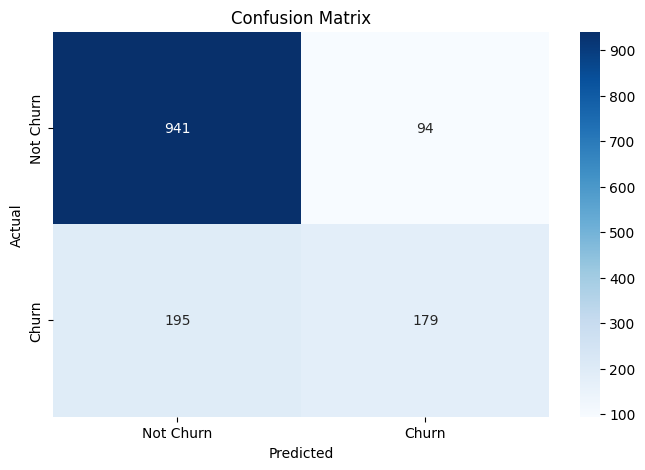

In [66]:
from sklearn.metrics import confusion_matrix

# Calculate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Not Churn", "Churn"], yticklabels=["Not Churn", "Churn"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

In [67]:
import joblib

# Save the model
joblib.dump(best_rf, "churn_model.pkl")


['churn_model.pkl']